In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import community as community_louvain
import time
pd.set_option('display.max_columns', None)

## Plotting Function

In [2]:
def draw_graph(G):
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(20, 7))
    pos = nx.spring_layout(G, k=0.15, iterations=20)  # k controls the distance between nodes
    
    # Draw nodes with gradient color based on degree
    node_colors = sns.color_palette("coolwarm", len(G.nodes))
    node_sizes = [(G.degree(n) * 100)+10 for n in G.nodes()]
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
    
    # Draw edges with transparency
    edges = nx.draw_networkx_edges(G, pos, alpha=0.4)
    
    # Add labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
    
    # Remove axis
    plt.axis('off')
    
    # Title and display
    plt.title('Network Overview', fontsize=20)
    plt.show()

## Getting the data

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()

user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')
port = os.getenv('DB_PORT')
db_dwh = os.getenv('DB_DWH')

In [4]:
engine_read = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{db_dwh}')

In [5]:
df = pd.read_sql('f_data', con = engine_read)
df = df.dropna()
df = df.loc[df['had_heart_attack'] == 1]

In [6]:
df.rename(columns={'state_code':'state', 'gender_id': 'gender', 'general_health_id':'general_health',
                                    'last_checkup_time_id':'last_checkup_time', 'removed_teeth_id':'removed_teeth',
                                    'diabetes_status_id':'diabetes_status', 'smoking_status_id':'smoking_status',
                                    'e_cigarette_usage_id':'e_cigarette_usage', 'race_ethnicity_category_id':'race_ethnicity_category',
                                    'age_category_id':'age_category', 'tetanus_last_10_tdap_id':'tetanus_last_10_tdap',
                                    'covid_pos_id':'covid_pos'}, inplace=True)

In [7]:
df['state'] = df['state'].astype(int)
df['gender'] = df['gender'].astype(int)
df['general_health'] = df['general_health'].astype(int)
df['last_checkup_time'] = df['last_checkup_time'].astype(int)
df['removed_teeth'] = df['removed_teeth'].astype(int)
df['diabetes_status'] = df['diabetes_status'].astype(int)
df['smoking_status'] = df['smoking_status'].astype(int)
df['e_cigarette_usage'] = df['e_cigarette_usage'].astype(int)
df['race_ethnicity_category'] = df['race_ethnicity_category'].astype(int)
df['age_category'] = df['age_category'].astype(int)
df['tetanus_last_10_tdap'] = df['tetanus_last_10_tdap'].astype(int)
df['covid_pos'] = df['covid_pos'].astype(int)
df['mental_health_days'] = df['mental_health_days'].astype(int)
df['physical_activities'] = df['physical_activities'].astype(int)
df['had_heart_attack'] = df['had_heart_attack'].astype(int)
df['had_angina'] = df['had_angina'].astype(int)
df['had_stroke'] = df['had_stroke'].astype(int)
df['had_asthma'] = df['had_asthma'].astype(int)
df['had_skin_cancer'] = df['had_skin_cancer'].astype(int)
df['had_copd'] = df['had_copd'].astype(int)
df['had_depressive_disorder'] = df['had_depressive_disorder'].astype(int)
df['had_kidney_disease'] = df['had_kidney_disease'].astype(int)
df['had_arthritis'] = df['had_arthritis'].astype(int)
df['deaf_or_hard_of_hearing'] = df['deaf_or_hard_of_hearing'].astype(int)
df['blind_or_vision_difficulity'] = df['blind_or_vision_difficulity'].astype(int)
df['difficulty_concentrating'] = df['difficulty_concentrating'].astype(int)
df['difficulty_walking'] = df['difficulty_walking'].astype(int)
df['difficulty_dressing_bathing'] = df['difficulty_dressing_bathing'].astype(int)
df['difficulty_errands'] = df['difficulty_errands'].astype(int)
df['chest_scan'] = df['chest_scan'].astype(int)
df['alcohol_drinkers'] = df['alcohol_drinkers'].astype(int)
df['hiv_testing'] = df['hiv_testing'].astype(int)
df['flu_vax_last_12'] = df['flu_vax_last_12'].astype(int)
df['pneumo_vax_ever'] = df['pneumo_vax_ever'].astype(int)
df['high_risk_last_year'] = df['high_risk_last_year'].astype(int)

In [8]:
df.head()

,id,survey_date,diagnose_date,state,gender,general_health,physical_health_days,mental_health_days,last_checkup_time,physical_activities,sleep_hours,removed_teeth,had_heart_attack,had_angina,had_stroke,had_asthma,had_skin_cancer,had_copd,had_depressive_disorder,had_kidney_disease,had_arthritis,diabetes_status,deaf_or_hard_of_hearing,blind_or_vision_difficulity,difficulty_concentrating,difficulty_walking,difficulty_dressing_bathing,difficulty_errands,smoking_status,e_cigarette_usage,chest_scan,race_ethnicity_category,age_category,height_in_meters,weight_in_kilograms,bmi,alcohol_drinkers,hiv_testing,flu_vax_last_12,pneumo_vax_ever,tetanus_last_10_tdap,high_risk_last_year,covid_pos
352,353,2022-05-23,2022-04-05,1,1,4,5.0,0,1,1,8.0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,4,1,1,1,12,1.75,74.84,24.37,0,1,1,1,4,0,1
364,365,2022-06-21,2021-11-28,1,1,3,5.0,0,1,1,5.0,2,1,0,0,0,1,0,0,0,1,3,0,0,1,1,0,0,1,3,1,1,9,1.88,115.67,32.74,0,0,1,1,3,0,2
422,423,2022-05-04,2021-05-17,1,1,3,0.0,0,1,1,6.0,1,1,1,0,0,0,0,0,0,1,3,1,0,0,1,0,0,3,4,0,1,13,1.78,71.67,22.67,0,0,1,1,1,0,2
425,426,2022-05-10,2021-06-06,1,1,3,3.0,27,1,1,5.0,2,1,1,0,0,0,0,1,0,0,3,0,0,0,0,0,0,3,1,1,2,10,1.85,123.83,36.02,0,0,1,0,3,0,1
435,436,2022-06-28,2021-12-19,1,1,3,0.0,0,1,1,8.0,1,1,1,1,0,0,0,0,1,1,3,1,0,0,0,0,0,4,1,1,1,10,1.78,95.25,30.13,0,1,1,1,3,0,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13554 entries, 352 to 445130
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           13554 non-null  int64         
 1   survey_date                  13554 non-null  datetime64[ns]
 2   diagnose_date                13554 non-null  datetime64[ns]
 3   state                        13554 non-null  int32         
 4   gender                       13554 non-null  int32         
 5   general_health               13554 non-null  int32         
 6   physical_health_days         13554 non-null  float64       
 7   mental_health_days           13554 non-null  int32         
 8   last_checkup_time            13554 non-null  int32         
 9   physical_activities          13554 non-null  int32         
 10  sleep_hours                  13554 non-null  float64       
 11  removed_teeth                13554 non-null

In [10]:
df.columns

Index(['id', 'survey_date', 'diagnose_date', 'state', 'gender',
       'general_health', 'physical_health_days', 'mental_health_days',
       'last_checkup_time', 'physical_activities', 'sleep_hours',
       'removed_teeth', 'had_heart_attack', 'had_angina', 'had_stroke',
       'had_asthma', 'had_skin_cancer', 'had_copd', 'had_depressive_disorder',
       'had_kidney_disease', 'had_arthritis', 'diabetes_status',
       'deaf_or_hard_of_hearing', 'blind_or_vision_difficulity',
       'difficulty_concentrating', 'difficulty_walking',
       'difficulty_dressing_bathing', 'difficulty_errands', 'smoking_status',
       'e_cigarette_usage', 'chest_scan', 'race_ethnicity_category',
       'age_category', 'height_in_meters', 'weight_in_kilograms', 'bmi',
       'alcohol_drinkers', 'hiv_testing', 'flu_vax_last_12', 'pneumo_vax_ever',
       'tetanus_last_10_tdap', 'high_risk_last_year', 'covid_pos'],
      dtype='object')

In [11]:
diseases = ['had_heart_attack', 'had_angina', 'had_stroke', 'had_asthma', 'had_skin_cancer', 'had_copd',
           'had_depressive_disorder', 'had_kidney_disease', 'had_arthritis', 'physical_activities',
           'deaf_or_hard_of_hearing', 'blind_or_vision_difficulity', 'difficulty_concentrating',
           'difficulty_walking', 'difficulty_dressing_bathing', 'difficulty_errands', 'alcohol_drinkers']

In [12]:
G = nx.Graph()

In [13]:
G.add_nodes_from(diseases)

In [14]:
for i in diseases:
    for j in diseases:
       if i != j:
           v = df.loc[(df[i] == 1) & (df[j] == 1)].shape[0]
           if v > 1000:
               G.add_edge(i, j)

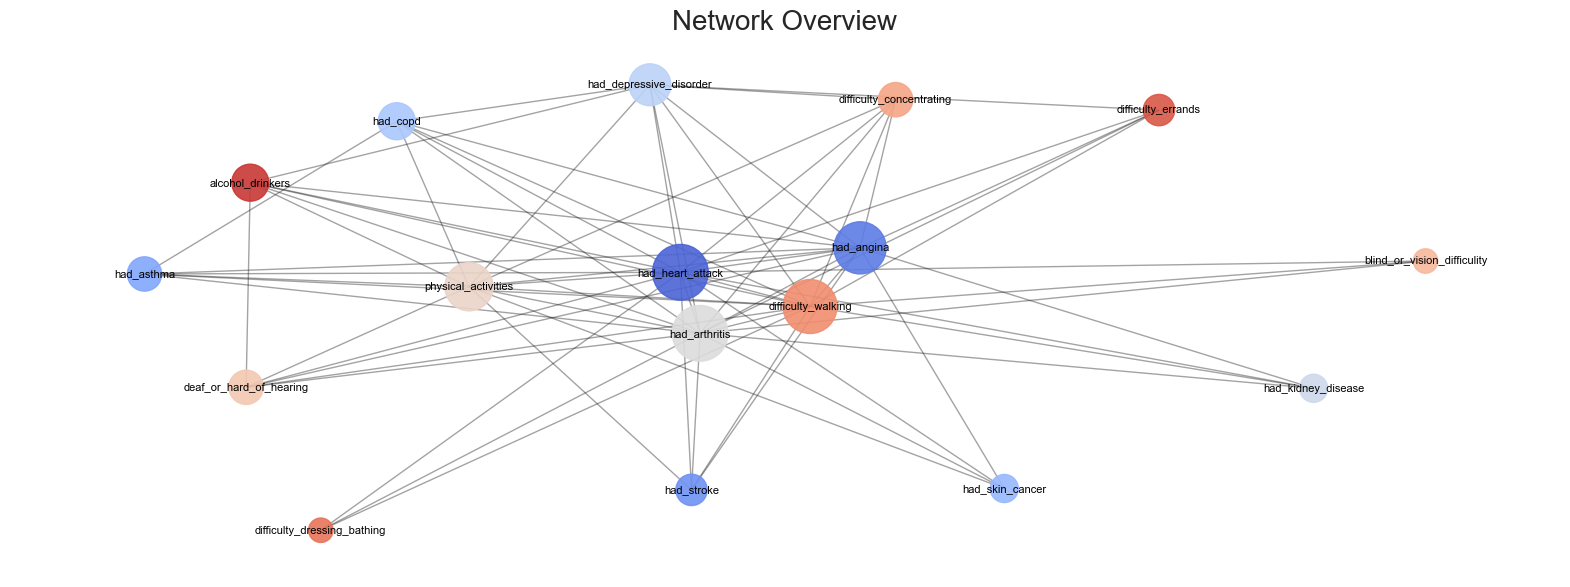

In [15]:
draw_graph(G)

In [16]:
nx.average_clustering(G)

0.8379215555686144

In [17]:
nx.density(G)

0.5073529411764706

In [18]:
degree_list_1 = []
betweenness_list_1 = []
closeness_list_1 = []

for i in nx.degree_centrality(G).values():
    degree_list_1.append(round(i,1))

for i in nx.betweenness_centrality(G).values():
    betweenness_list_1.append(round(i,1))

for i in nx.closeness_centrality(G).values():
    closeness_list_1.append(round(i,1))

In [19]:
d1 = {
    'Diseases': diseases,
    'Degree_Centrality': degree_list_1,
    'Betweenness_Centrality': betweenness_list_1,
    'Closeness_Centrality': closeness_list_1,
}
infos_df = pd.DataFrame(d1)

In [20]:
infos_df.set_index(infos_df['Diseases'], inplace=True)
infos_df.drop(columns='Diseases', axis=1, inplace=True)
infos_df

,Degree_Centrality,Betweenness_Centrality,Closeness_Centrality
Diseases,,,
had_heart_attack,1.0,0.2,1.0
had_angina,0.9,0.1,0.9
had_stroke,0.3,0.0,0.6
had_asthma,0.4,0.0,0.6
had_skin_cancer,0.2,0.0,0.6
had_copd,0.4,0.0,0.6
had_depressive_disorder,0.6,0.0,0.7
had_kidney_disease,0.2,0.0,0.6
had_arthritis,1.0,0.2,1.0


## Communities

In [21]:
def draw_partition(G, partition):
    import matplotlib.pyplot as plt

    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 7))
    pos = nx.spring_layout(G, k=0.15, iterations=20)
    node_sizes = [(G.degree(n) * 100)+10 for n in G.nodes()]

    nodes = nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=node_sizes
                                   , node_color=list(partition.values()), alpha=0.9)
    
    edges = nx.draw_networkx_edges(G, pos, alpha=0.4)

    # nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
    
    plt.axis('off')
    
    # Title and display
    plt.title('Communities', fontsize=20)
    plt.show()

In [22]:
partition = community_louvain.best_partition(G, resolution=2)

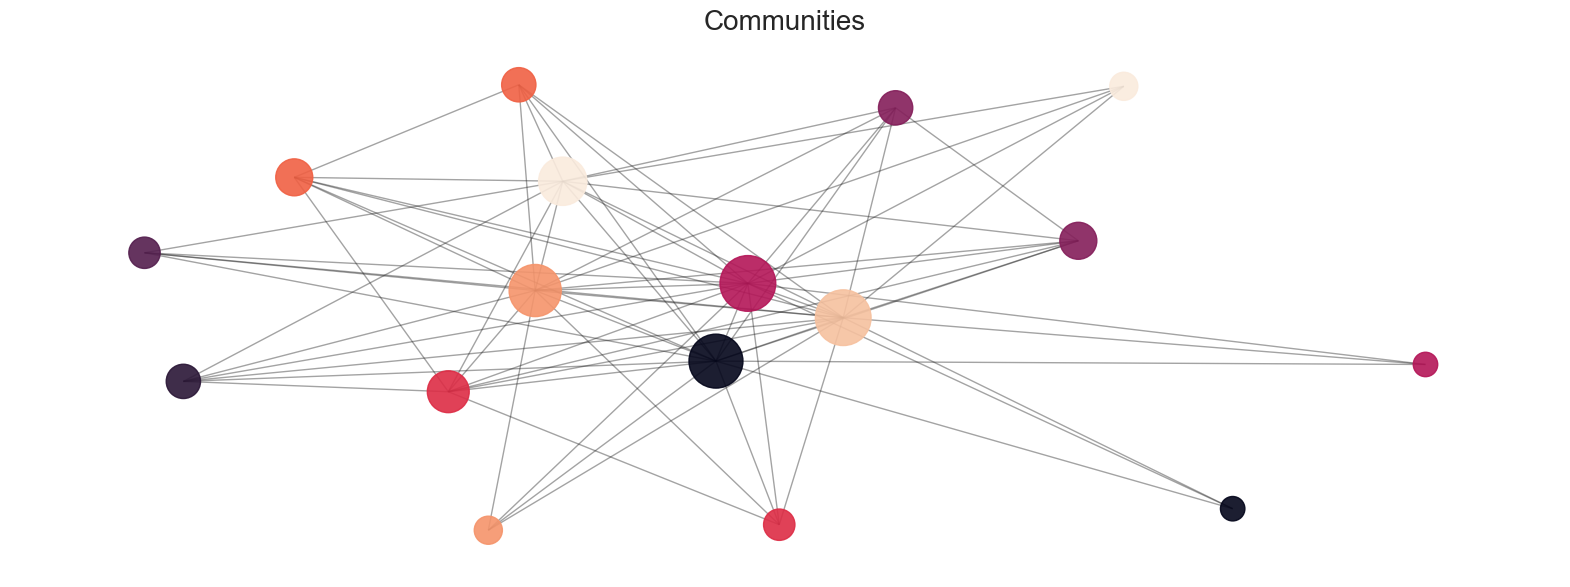

In [23]:
draw_partition(G, partition)

In [24]:
community_df = pd.DataFrame(partition, index=[0]).T # to transpose the df, so it puts the keys in the dict 'partition' in a row
community_df.columns = ['community'] # renaming
community_df.reset_index(inplace=True) # making the nodes a column
community_df.rename(columns={'index': 'node'}, inplace=True)

In [25]:
community_df

,node,community
0,had_heart_attack,4
1,had_angina,7
2,had_stroke,2
3,had_asthma,3
4,had_skin_cancer,9
5,had_copd,3
6,had_depressive_disorder,5
7,had_kidney_disease,7
8,had_arthritis,8
9,physical_activities,9


In [26]:
community_df['community'].max()

9

In [27]:
communities_list = list(community_df.community.unique())
communities_list.sort()
print(communities_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [28]:
community_nodes = {} # to save the nodes in each community
for i in communities_list:
    l = community_df.loc[community_df['community'] == i, 'node'].to_list()
    community_nodes[i] = l
community_nodes

{0: ['blind_or_vision_difficulity', 'difficulty_walking'],
 1: ['difficulty_concentrating'],
 2: ['had_stroke'],
 3: ['had_asthma', 'had_copd'],
 4: ['had_heart_attack', 'difficulty_dressing_bathing'],
 5: ['had_depressive_disorder', 'difficulty_errands'],
 6: ['deaf_or_hard_of_hearing', 'alcohol_drinkers'],
 7: ['had_angina', 'had_kidney_disease'],
 8: ['had_arthritis'],
 9: ['had_skin_cancer', 'physical_activities']}

In [29]:
d_graphs = {} # to save these nodes as subgraphs
for i in communities_list:
    g = G.subgraph(community_nodes[i])
    d_graphs[i] = g
# d_graphs

In [30]:
# getting the metrics for each community
degree_list = []
betweenness_list = []
closeness_list = []
clustering_list = []
density_list = []

for i in range(0, len(community_df.community.unique())):
    degree_list.append(np.mean(list(nx.degree_centrality(d_graphs[i]).values())).round(1))
    betweenness_list.append(np.mean(list(nx.betweenness_centrality(d_graphs[i]).values())).round(1))
    closeness_list.append(np.mean(list(nx.closeness_centrality(d_graphs[i]).values())).round(1))
    clustering_list.append(round(nx.average_clustering(d_graphs[i]), 1))
    density_list.append(round(nx.density(d_graphs[6]), 1))

In [31]:
# d2, just to help to make a DataFrame
d2 = {
    'communities': communities_list,
    'Mean_Degree_Centrality': degree_list,
    'Mean_Betweenness_Centrality': betweenness_list,
    'Mean_Closeness_Centrality': closeness_list,
    'Mean_Clustering_Centrality': clustering_list,
    'Density': degree_list
}
final_df = pd.DataFrame(d2)

In [32]:
final_df.sort_values(by='communities', ascending=True, inplace=True)
final_df.set_index(final_df['communities'], inplace=True)
final_df.drop(columns='communities', axis=1, inplace=True)
final_df

,Mean_Degree_Centrality,Mean_Betweenness_Centrality,Mean_Closeness_Centrality,Mean_Clustering_Centrality,Density
communities,,,,,
0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0
5,1.0,0.0,1.0,0.0,1.0
6,1.0,0.0,1.0,0.0,1.0
7,1.0,0.0,1.0,0.0,1.0
8,1.0,0.0,0.0,0.0,1.0
